<a href="https://colab.research.google.com/github/varunkr24/Capstone-Project/blob/Python/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# import needed libraries
import os as os
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Mount the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
carnames = pd.read_csv('/content/drive/MyDrive/Dataset/Car names and make.csv', header = None)

In [4]:
carnames.head()

,0
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [5]:
len(carnames[0].unique())
# or carnames.value_counts().sum()

196

196 model/car names are there in the dataset

In [6]:
Train_annot = pd.read_csv('/content/drive/MyDrive/Dataset/Annotations/Train Annotations.csv')

In [7]:
Test_annot = pd.read_csv('/content/drive/MyDrive/Dataset/Annotations/Test Annotation.csv')

In [8]:
Train_annot.head()

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [9]:
Train_annot['Image class'].max(), Test_annot['Image class'].max()

(196, 196)

In [ ]:
Train_annot.rename(columns= {'Image Name':'Image Name', 'Bounding Box coordinates':'x1', 'Unnamed: 2':'y1', 'Unnamed: 3':'x2',
                             'Unnamed: 4':'y2','Image class':'Image class'}, inplace = True)

In [10]:
pathToCarImages = '/content/drive/MyDrive/Dataset/Car Images/Train Images/'
listing = os.listdir( pathToCarImages)

In [11]:
listing

['.DS_Store',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura Integra Type R 2001',
 'AM General Hummer SUV 2000',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Audi 100 Sedan 1994',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Audi 100 Wagon 1994',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Audi S6 Sedan 2011',
 'Audi S4 Sedan 2007',
 'Audi S5 Convertible 2012',
 'Audi S4 Sedan 2012',
 'Audi S5 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi TT RS Coupe 2012',
 'Audi TT Hatchback 2011',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'BMW 1 Series Coupe 2012',
 'Bentley Continental Flying Spur Sedan 2007',
 'Bentley Continental GT Coupe 2007',
 'Bentley Continental GT Coupe 2012',
 'BMW 1 Series Convertible 2012',
 'Bentley Arnage Sedan 2009',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Audi TTS Coupe 2012',
 'Bentley Mulsanne Sedan 2011',
 'Audi V8

# Loading the dataset

In [12]:
import cv2

In [13]:
pathToCarImages = '/content/drive/MyDrive/Dataset/Car Images/Train Images/'
listing = os.listdir( pathToCarImages)
num_folders = len(listing)
print ( num_folders)
CarImagesArray = [[]]
CarImagesPaths = []
CarImagesCategories = []
CarImages = []
CarImagesName = []
t0=time.time()

for imgFolder in listing:
  #print(imgFolder)
  path = pathToCarImages + imgFolder
  if os.path.isdir(path):
    files = os.listdir(path)
    for imgFile in files:
      imgPath = path + '/' + imgFile
      CarImages.append(cv2.imread(imgPath, cv2.COLOR_BGR2RGB)) # images
      CarImagesArray.append([imgPath, imgFolder]) # image path, image folder
      CarImagesPaths.append(imgPath) # paths to images
      CarImagesCategories.append(imgFolder) # labels
      CarImagesName.append(imgFile) # Image name

197


In [ ]:
len(pd.DataFrame(CarImagesCategories)[0].unique())

196

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
  print(pd.DataFrame(CarImagesCategories).value_counts())


GMC Savana Van 2012                                       68
Chrysler 300 SRT-8 2010                                   49
Mercedes-Benz 300-Class Convertible 1993                  48
Mitsubishi Lancer Sedan 2012                              48
Jaguar XK XKR 2012                                        47
Chevrolet Corvette ZR1 2012                               47
Suzuki Kizashi Sedan 2012                                 46
Mercedes-Benz C-Class Sedan 2012                          46
Nissan 240SX Coupe 1998                                   46
Ford GT Coupe 2006                                        46
Dodge Durango SUV 2007                                    46
Eagle Talon Hatchback 1998                                46
Bentley Continental GT Coupe 2007                         46
Volvo 240 Sedan 1993                                      46
Volkswagen Golf Hatchback 1991                            46
Audi S6 Sedan 2011                                        46
Chevrolet Avalanche Crew

In [ ]:
CarImages[3].shape

(225, 450, 3)

In [ ]:
CarImages[6].shape

(319, 478, 3)

In [ ]:
CarImages[9].shape

(360, 480, 3)

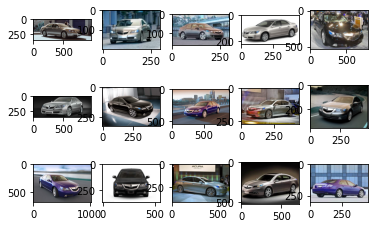

In [ ]:
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(CarImages[i])

# Dispaly images

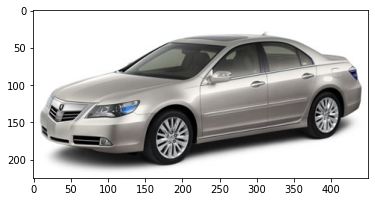

In [ ]:
plt.imshow(CarImages[3])

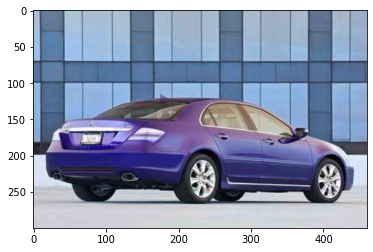

In [ ]:
plt.imshow(CarImages[14])

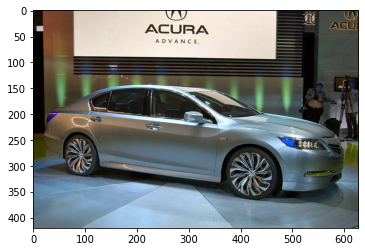

In [ ]:
plt.imshow(CarImages[12])

# Display Image with Label

Label:
Acura RL Sedan 2012


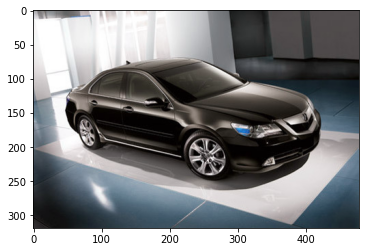

In [ ]:
print('Label:')
print(CarImagesCategories[6])
plt.imshow(CarImages[6])

In [ ]:
CarImagesPaths[0] # paths to image

'/content/drive/MyDrive/Dataset/Car Images/Train Images/Acura RL Sedan 2012/01034.jpg'

In [ ]:
Train_annot[Train_annot['Image Name']=='01034.jpg']

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
1033,01034.jpg,115,63,817,324,2


In [ ]:
testimage = cv2.imread(CarImagesPaths[0])
cv2.rectangle(testimage,(115,63),(817,324),(0,255,0),2) # add rectangle to image

array([[[145, 141, 140],
        [145, 141, 140],
        [139, 135, 134],
        ...,
        [ 86,  89,  97],
        [ 85,  88,  96],
        [ 86,  89,  97]],

       [[144, 140, 139],
        [143, 139, 138],
        [140, 136, 135],
        ...,
        [ 86,  89,  97],
        [ 85,  88,  96],
        [ 86,  89,  97]],

       [[142, 138, 137],
        [137, 133, 132],
        [136, 132, 131],
        ...,
        [ 84,  87,  95],
        [ 83,  86,  94],
        [ 85,  88,  96]],

       ...,

       [[210, 229, 234],
        [210, 229, 234],
        [212, 231, 236],
        ...,
        [198, 216, 223],
        [198, 216, 223],
        [197, 215, 222]],

       [[216, 235, 240],
        [215, 234, 239],
        [214, 233, 238],
        ...,
        [198, 216, 223],
        [199, 217, 224],
        [198, 216, 223]],

       [[218, 237, 242],
        [216, 235, 240],
        [213, 232, 237],
        ...,
        [198, 216, 223],
        [199, 217, 224],
        [199, 217, 224]]

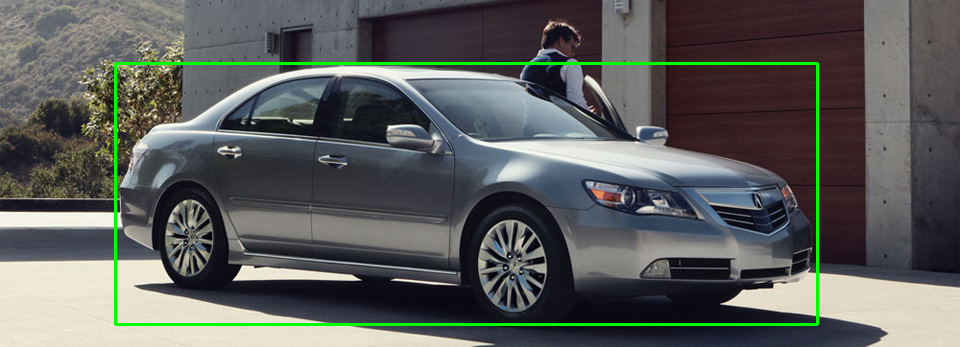

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(testimage)

# Apply filters on images

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


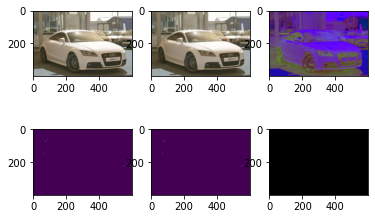

In [ ]:
clearTrainImg = []
examples = []; getEx = True
for img in CarImages:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without background
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

**Blur effect on Image**

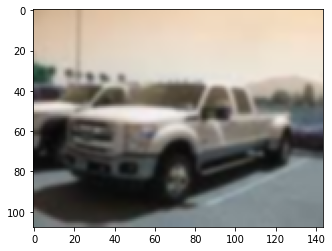

In [ ]:
plt.imshow(blurImg)

**Note**    
Images names have been used as labels. One should use One hot encoder or label encoder as per model requirement

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CarImagesCategories)
x = le.transform(CarImagesCategories)

# Thanks